# Analyze Satisfaction Survey Responses


### Import packages to the notebook

Import the `requests`, `base64`, `StringIO`, `pandas`, `SparkContext`, `json`, and `re` packages to use in the notebook. The  pandas package is traditionally imported as `pd`: 

In [1]:
import requests, StringIO, pandas as pd, json, re, sys
from pyspark import SparkContext

###  Access Object Storage

Because the `surveys.csv` file is located in Object Storage, you need to define a helper function to access the data file that you loaded. Run the following cell to define the method `get_file_content()`:

In [2]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

### Insert data source credentials

The credentials for accessing the `surveys.csv` file are added to the cell as a Python dictionary. With these credentials, you can use the helper function to load the data file into a `pandas.DataFrame`. 

**Note**: When you select the `Insert to code` function, a code cell with a dictionary is created for you.  Adjust the credentials in the Python dictionary to correspond with the credentials inserted by the `Insert to code` function and run the dictionary code cell. The access credentials to the Object Storage instance in the dictionary are provided for convenience for later usage. 

In [1]:
# The code was removed by DSX for sharing.

,EXPOSURE,ADDRESS,INCIDENT NUMBER,INCIDENT TYPE,PROPERTY USE,ENGINE AREA,DATE OF CALL,TIME OF CALL,DATE OF DISPATCH,TIME OF DISPATCH,DATE OF ARRIVAL,TIME OF ARRIVAL,DATE UNIT CLEARED,TIME UNIT CLEARED,DETECTOR,CIVILIAN INJURY,CIVILIAN FATALITY,FIRE PERSONNEL INJURY,FIRE PERSONNEL FATALITY
0,No,"19352 MEYERS RD, DETROIT",1,444 - Power line down,"Residential street, road or residential driveway",E30,1/1/16,12:06:10 AM,1/1/2016,12:10:16 AM,1/1/2016,12:17:03 AM,1/1/2016,2:03:12 AM,NaN,0,0,0,0
1,No,"13689 TROESTER ST, DETROIT",2,"445 - Arcing, shorted electrical equipment","Residential street, road or residential driveway",E50,1/1/16,12:10:54 AM,1/1/2016,12:12:18 AM,1/1/2016,12:21:02 AM,1/1/2016,12:29:17 AM,NaN,0,0,0,0
2,No,"18200 JOHN R ST, DETROIT",3,"445 - Arcing, shorted electrical equipment","Church, mosque, synagogue, temple, chapel",E44,1/1/16,12:11:34 AM,1/1/2016,12:13:09 AM,1/1/2016,12:17:18 AM,1/1/2016,12:18:53 AM,NaN,0,0,0,0
3,No,"120 WEBB ST, DETROIT",4,444 - Power line down,Electrical distribution,E21,1/1/16,12:11:36 AM,1/1/2016,12:13:24 AM,1/1/2016,12:17:55 AM,1/1/2016,1:30:38 AM,NaN,0,0,0,0
4,No,"GRATIOT AVE / LAPPIN ST, DETROIT",5,"151 - Outside rubbish, trash or waste fire",1 or 2 family dwelling \ House \ Resident,E60,1/1/16,12:12:11 AM,1/1/2016,12:13:32 AM,1/1/2016,12:19:54 AM,1/1/2016,12:23:28 AM,NaN,0,0,0,0


In [3]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_bba657a7_8df1_4195_9b30_542141270d03',
  'project_id':'d2e412da592d4d84a4dc8d76834a8563',
  'region':'dallas',
  'user_id':'170225960b87467faa79f045c5f045f0',
  'domain_id':'314fddbb29484a108552298025e4477b',
  'domain_name':'1080001',
  'username':'admin_b069330f0f8b59af7a61cfba747a8114a1bbb508',
  'password':"""Xv!y7Lj^I5ZazdpX""",
  'filename':'surveys.csv',
  'container':'notebooks',
  'tenantId':'sa40-897700f6b3fee3-ac63c96e2357'
}

### Load data into `pandas DataFrame`

Run the next cell to load the data into a pandas DataFrame: 

In [4]:
content_string = get_file_content(credentials_2)
surveys_df = pd.read_csv(content_string)

<a id="explore_data"></a> 
## 4. Explore data

Show the first five and the last five rows of the data by using the `head()` and `tail()` methods.  Run each code cell:

In [5]:
surveys_df.head()

,SectionName,dept,CommentText
0,Room,a03a76f447a2a78a14c420968b7d6321b903bc18d6d090...,"They cleaned at night time, they were fast & q..."
1,Meals,a03a76f447a2a78a14c420968b7d6321b903bc18d6d090...,The salads were good. Some of the main entree...
2,Tests and Treatment,a03a76f447a2a78a14c420968b7d6321b903bc18d6d090...,They asked if I understood & if it was OK to p...
3,Personal Issues,a03a76f447a2a78a14c420968b7d6321b903bc18d6d090...,The nurses were very helpful & caring. Treate...
4,Meals,aa79e7b740b862d35591300ccd06885f864eb2160222b8...,Limited selection. Hours of availability.


In [6]:
surveys_df.tail()

,SectionName,dept,CommentText
995,Meals,ab9d1b895c331418376465a13e9a49224c817e0ef90c91...,Tray had regular items - when I was to get dia...
996,Personal Issues,ab9d1b895c331418376465a13e9a49224c817e0ef90c91...,Any problems fixed at once.
997,Meals,538671ce4a524e33b0585dfb298a50f06e35f68ccf0c39...,Always on time.
998,Room,538671ce4a524e33b0585dfb298a50f06e35f68ccf0c39...,Didn't mop floors only change trash.
999,Personal Issues,538671ce4a524e33b0585dfb298a50f06e35f68ccf0c39...,Nurses on B1 are great.


Each row in the table lists:

* The facility where the survey was done.
* The type of survey invoeld.

## Unique Facilities (Anonymized)

In [7]:
surveys_df.dept.unique()

array(['a03a76f447a2a78a14c420968b7d6321b903bc18d6d090f26205ca784e9fd730',
       'aa79e7b740b862d35591300ccd06885f864eb2160222b83107f7c7493153af63',
       'fc8e9a93208787d3385777da843db934c2a6babbca89c500f06b0ea2a4b34daa',
       'b148428966e70b9778ea073168b1f0c0ccc1b8bfd7027a6641835e9200920ba7',
       'ce34e185e1085451ec06d40a63363886a643b7ab102ac8c236dee51c2cc238da',
       'ab9d1b895c331418376465a13e9a49224c817e0ef90c91d1d2b70795177fb5aa',
       'dbbfc0fe8bcca58ae13a3d6c997cd353dfe7b90202dbc6ab4c7af3d28bc94711',
       '82c07801023ca5caad6fb81bb5958dbf3d095191c226a4d512e125b4aaa16506',
       '3e4423f2c0fea026561654892fb2025f52549af39a8bf7c7e8669f47145cb3d2',
       'fbf29199bce1917852dcc5d2f9851f592d416d7abfee22688c5ada60e6367e8f',
       'a7865dc86bb17f592d5ba2ac3deeb93b5c68496b97463c8343f2670e710b0467',
       'af80202c5afd453e7f482e264c89fe1f07dd463612aa9f7e2d453dfcf26c62c4',
       'fd4a711ed9bde9026f91d73c201c94611156e36cf3793f8c6e1b66a95f7cc795',
       '12fb53bbe147bfe9b

## Unique Survey Sections

In [8]:
surveys_df.SectionName.unique()

array(['Room', 'Meals', 'Tests and Treatment', 'Personal Issues'], dtype=object)

In [9]:
def removePunctuation(text):
    """Removes punctuation, changes to lowercase, and strips leading and trailing spaces.
    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated. (e.g. it's becomes its)
    Args:
        text (str): A string.
    Returns:
        str: The cleaned up string.
    """
    return re.sub('[^a-z| |0-9]', '', text.strip().lower())

print removePunctuation("42 is the answer to life's BIG questions! ")

surveys_df['CommentText'] = surveys_df['CommentText'].apply(removePunctuation)

42 is the answer to lifes big questions


Let's build an index by dept

In [10]:
surveys_df = surveys_df.set_index(surveys_df["dept"])
surveys_df.drop(['dept'], axis=1, inplace=True)
surveys_df.head()

,SectionName,CommentText
dept,,
a03a76f447a2a78a14c420968b7d6321b903bc18d6d090f26205ca784e9fd730,Room,they cleaned at night time they were fast quiet
a03a76f447a2a78a14c420968b7d6321b903bc18d6d090f26205ca784e9fd730,Meals,the salads were good some of the main entrees...
a03a76f447a2a78a14c420968b7d6321b903bc18d6d090f26205ca784e9fd730,Tests and Treatment,they asked if i understood if it was ok to pr...
a03a76f447a2a78a14c420968b7d6321b903bc18d6d090f26205ca784e9fd730,Personal Issues,the nurses were very helpful caring treated ...
aa79e7b740b862d35591300ccd06885f864eb2160222b83107f7c7493153af63,Meals,limited selection hours of availability


## Convert to Spark Data Frame from Pandas

In [11]:
from pyspark.sql import SQLContext
print sc
sqlCtx = SQLContext(sc)
spark_df = sqlCtx.createDataFrame(surveys_df)
spark_df.printSchema()
countsBySection = spark_df.groupby("SectionName").count()
countsBySection.show()

root
 |-- SectionName: string (nullable = true)
 |-- CommentText: string (nullable = true)

+-------------------+-----+
|        SectionName|count|
+-------------------+-----+
|    Personal Issues|  288|
|              Meals|  299|
|Tests and Treatment|  192|
|               Room|  221|
+-------------------+-----+



In [12]:
words = spark_df.select("CommentText").rdd.map(lambda r: r[0])
counts = words.flatMap(lambda line: re.split('\W+', line.lower().strip())) \
            .filter(lambda x: len(x) > 2) \
            .map(lambda word: (word, 1)) \
            .reduceByKey(lambda a, b: a + b) \
            .map(lambda x: (x[1], x[0])).sortByKey(False) \
            .map(lambda x: (x[1], x[0]))
counts.take(20)

[(u'was', 630),
 (u'the', 566),
 (u'and', 285),
 (u'very', 237),
 (u'not', 206),
 (u'for', 185),
 (u'had', 180),
 (u'good', 153),
 (u'were', 139),
 (u'food', 131),
 (u'room', 131),
 (u'they', 105),
 (u'staff', 105),
 (u'with', 103),
 (u'that', 91),
 (u'did', 90),
 (u'have', 86),
 (u'nurse', 78),
 (u'all', 77),
 (u'never', 77)]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(words):
    values = map(lambda x: x[1], words)
    labels = map(lambda x: x[0], words)
    plt.barh(range(len(values)), values, color='grey')
    plt.yticks(range(len(values)), labels)
    plt.show()

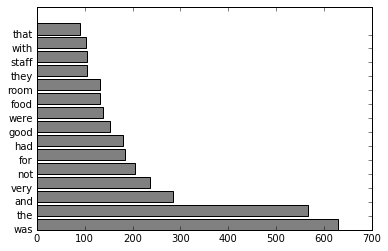

In [14]:
plot(counts.take(15))

In [15]:
from pyspark.mllib.feature import Word2Vec

inp = words.map(lambda row: row.split(" "))

word2vec = Word2Vec()
model = word2vec.fit(inp)

In [16]:
synonyms = model.findSynonyms('good', 40)

for word, cosine_distance in synonyms:
  print "{}: {}".format(word, cosine_distance)

nice: 0.570840838874
food: 0.570365105223
very: 0.569643334086
staff: 0.569559375726
were: 0.569002643114
all: 0.56098072703
care: 0.560685818301
hospital: 0.552808387055
service: 0.552349868275
thanks: 0.550660787224
person: 0.546631893771
comfortable: 0.5378558313
your: 0.536923507333
explained: 0.535156451615
terrible: 0.534780995449
way: 0.534325191325
nursing: 0.533465610232
everyone: 0.532988515383
the: 0.532274423366
cleaning: 0.531949391065
pleasant: 0.531084405661
doctor: 0.52888903884
kitchen: 0.528263848781
thank: 0.527407774101
taking: 0.526722443761
best: 0.526639562876
who: 0.526400306255
excellent: 0.526322869862
part: 0.525366249114
nurses: 0.524434849494
people: 0.523825257543
icu: 0.523513193163
rest: 0.523363001189
our: 0.52329009066
friendly: 0.522546145579
well: 0.52241966624
kind: 0.522279546279
patient: 0.521963962472
job: 0.521624159653
more: 0.520721605099


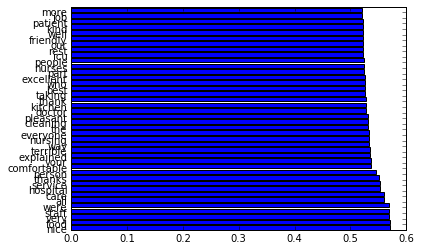

In [17]:
values = map(lambda x: x[1], synonyms)
labels = map(lambda x: x[0], synonyms)
plt.barh(range(len(values)), values, color='blue')
plt.yticks(range(len(values)), labels)
plt.show()

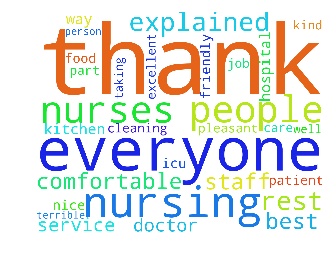

In [18]:
!pip install wordcloud --user nltk
from wordcloud import WordCloud, STOPWORDS

wordList = " ".join([x[0] for x in synonyms for times in range(0, int(x[1]*10))])
 
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      relative_scaling=.5,
                      width=1800,
                      height=1400
                     ).generate(wordList)
 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
synonyms = model.findSynonyms('bad', 40)

for word, cosine_distance in synonyms:
  print "{}: {}".format(word, cosine_distance)

but: 0.484259696686
her: 0.484066947929
them: 0.483930672312
late: 0.483636293941
med: 0.483273837861
would: 0.48280338957
pm: 0.482452119017
also: 0.482407891782
beyond: 0.482334484088
10: 0.482225324816
dont: 0.482201515795
you: 0.482018974229
didnt: 0.481967123057
meds: 0.481862733582
courtesy: 0.481804140924
bed: 0.481312178718
having: 0.481038267927
about: 0.48089975019
meals: 0.480748371033
great: 0.48070464401
order: 0.480612188676
which: 0.480414775854
wasnt: 0.480299021018
am: 0.480203727393
3: 0.480174565321
needed: 0.480074262043
come: 0.480038628005
got: 0.479954147812
cold: 0.479766818709
experiences: 0.479673688444
home: 0.4795013971
addressed: 0.479492936538
wonderful: 0.479450777699
one: 0.479349297594
soup: 0.47918710905
certain: 0.479081919176
see: 0.47897648687
too: 0.478711225103
could: 0.478263784899
tried: 0.47825600394


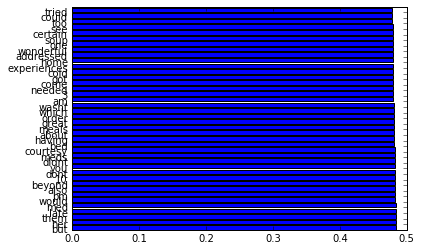

In [20]:
values = map(lambda x: x[1], synonyms)
labels = map(lambda x: x[0], synonyms)
plt.barh(range(len(values)), values, color='blue')
plt.yticks(range(len(values)), labels)
plt.show()

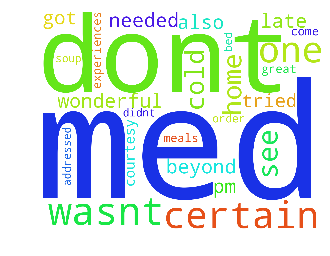

In [21]:
!pip install wordcloud --user nltk
from wordcloud import WordCloud, STOPWORDS

wordList = " ".join([x[0] for x in synonyms for times in range(0, int(x[1]*10))])
 
wordcloud = WordCloud(stopwords=STOPWORDS,
                      #max_font_size=40,
                      relative_scaling=.5,
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(wordList)
 
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [22]:
!pip install watson_developer_cloud --user nltk

import json
from watson_developer_cloud import ToneAnalyzerV3

tone_analyzer = ToneAnalyzerV3(
    username='e6eb62c2-cb6f-4036-9ad8-666afd8cd185',
    password='wxoRyaPj1d4m',
    version='2016-02-11')

toneRows = spark_df.select("CommentText").take(100)

tones = []

for r in toneRows:
    tones.append(json.dumps(tone_analyzer.tone(text=str(r)), indent=2))

In [23]:
from collections import defaultdict

score_list = defaultdict(list)

# Build Dict of Tonal Scores
for i in tones:
    data = json.loads(str(i))
    for r in data['document_tone']['tone_categories']:
        for score in r['tones']:
            score_list[score['tone_name']].append(score['score'])

# Average Tonal Sentiment by Tone Category
avgDict = {}
for k,v in score_list.iteritems():
    # v is the list of grades for student k
    avgDict[k] = sum(v)/ float(len(v))
print("Tone Category Averages")
print(json.dumps(avgDict, indent=2))
            
# Display Tonal Scores Human Readable
for i in tones:
    data = json.loads(str(i))
    for r in data['document_tone']['tone_categories']:
        print(r['category_name'])
        print("-" * len(r['category_name']))
        for j in r['tones']:
            print(j['tone_name'].ljust(20),(str(round(j['score'] * 100,1)) + "%").rjust(10))
        print()

Tone Category Averages
{
  "Disgust": 0.27402632, 
  "Tentative": 0.12892, 
  "Emotional Range": 0.6705899999999998, 
  "Joy": 0.24090254999999988, 
  "Sadness": 0.24776799000000005, 
  "Confident": 0.2089999999999999, 
  "Extraversion": 0.6888499999999997, 
  "Agreeableness": 0.5424199999999999, 
  "Conscientiousness": 0.40166000000000013, 
  "Openness": 0.3319699999999999, 
  "Analytical": 0.01766, 
  "Anger": 0.35890566999999995, 
  "Fear": 0.18495265999999996
}
Emotion Tone
------------
(u'Anger               ', '     18.4%')
(u'Disgust             ', '     13.6%')
(u'Fear                ', '     30.5%')
(u'Joy                 ', '     23.3%')
(u'Sadness             ', '     15.6%')
()
Writing Tone
------------
(u'Analytical          ', '      0.0%')
(u'Confident           ', '      0.0%')
(u'Tentative           ', '      0.0%')
()
Social Tone
-----------
(u'Openness            ', '     10.3%')
(u'Conscientiousness   ', '     88.3%')
(u'Extraversion        ', '     85.2%')
(u'Agree

## Thank you for your time!

In [ ]:
import requests

url = 'https://kafka-rest-prod01.messagehub.services.us-south.bluemix.net:443/topics/sentiment'

headers = {'Content-type': 'application/vnd.kafka.json.v1+json',
           'X-Auth-Token': '0voZA4gXyOWP4ORu0LxarghaHMZaDwI0eDErLGoYyAProwgB'}

response = requests.put(url, data=tones[0], headers=headers)

print(response)

In [33]:
response = requests.get('https://kafka-rest-prod01.messagehub.services.us-south.bluemix.net:443/topics/sentiment', headers)
print(response)

<Response [401]>
{'Content-type': 'application/json', 'X-Auth-Token': '0voZA4gXyOWP4ORu0LxarghaHMZaDwI0eDErLGoYyAProwgB'}


In [25]:
spark_df.saveAsParquetFile("swift://notebooks.spark/surveys.parquet")

/usr/local/src/spark160master/spark/python/pyspark/sql/dataframe.py:121: UserWarning: saveAsParquetFile is deprecated. Use write.parquet() instead.
  warnings.warn("saveAsParquetFile is deprecated. Use write.parquet() instead.")


AnalysisException: u'path swift://notebooks.spark/surveys.parquet already exists.;'